In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "BiBit"
tool_suffix = "BiBit"
n_runs = 1

parameters = (("n_bics",[10,15,100]),
              ("pattern_bitsize",[8,16,32]),
              ("max_discr_val",[1.0,0.5,1.5,2.0])) 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/J/img"
tsv_outdir = "../simulated_datasets/results/J/"



In [4]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "n_bics=10,pattern_bitsize=8,max_discr_val=0.5"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_JBiclustGE(bic_file_path,n_runs=n_runs)[0]
        print(g,s,len(bics))

5 10 10
5 20 10
5 50 10
5 100 10
10 10 10
10 20 10
10 50 10
10 100 10
20 10 10
20 20 10
20 50 10
20 100 10
50 10 10
50 20 10
50 50 10
50 100 10
100 10 10
100 20 10
100 50 10
100 100 10


In [5]:
n_genes = 20
n_samples = 50
true_bic_fname = true_bic_fname_prefix+str(n_genes)+","+str(n_samples)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)



params_folder = "n_bics=10,pattern_bitsize=8,max_discr_val=0.5"
pred_bic_fname = pred_bic_fname_prefix+str(n_genes)+","+str(n_samples)+pred_bic_fname_suffix
pred_bic_fname
bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
bic_file_path 

'../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=8,max_discr_val=0.5/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT'

In [6]:
runs = parse_JBiclustGE(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, len(pred_bics),np.mean(F1_per_bic(true_bics, pred_bics)) )


0 10 0.006988951910262742


In [7]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT
Failed to parse 

Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT
Failed to

In [8]:
#results.head(20)

In [9]:
parameters

(('n_bics', [10, 15, 100]),
 ('pattern_bitsize', [8, 16, 32]),
 ('max_discr_val', [1.0, 0.5, 1.5, 2.0]))

Total combinations: 36
[(100, 8, 0.5) (100, 16, 2.0) (100, 16, 1.5) (100, 16, 1.0) (100, 16, 0.5)
 (100, 8, 2.0) (100, 8, 1.5) (100, 8, 1.0) (15, 16, 2.0) (15, 8, 1.5)
 (15, 8, 2.0) (15, 16, 0.5) (15, 16, 1.5) (15, 16, 1.0) (15, 8, 0.5)
 (15, 8, 1.0) (10, 16, 1.0) (10, 16, 1.5) (10, 16, 0.5) (10, 8, 2.0)]
Top 20 paramter combinations


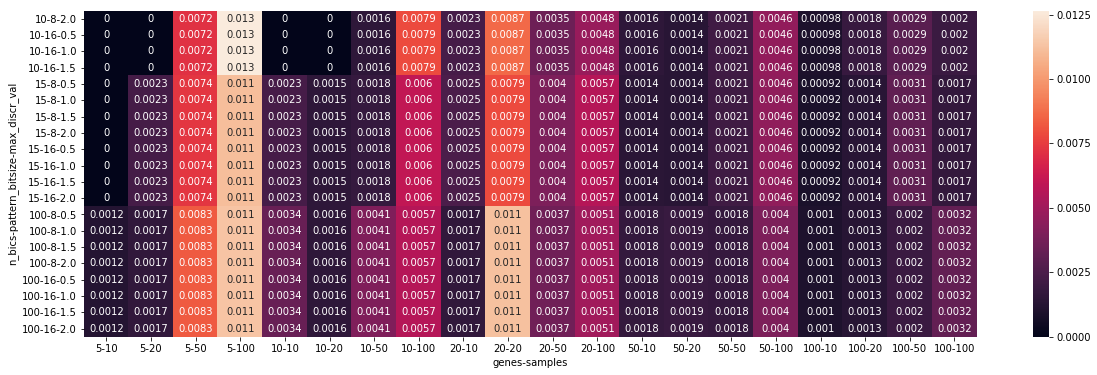

In [10]:
params = ["n_bics","pattern_bitsize","max_discr_val"]
plot_file = img_outdir+"/" + tool_suffix+".J_rel.heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".J_rel.heatmap.tsv"

heatmap = plot_performance_heatmap(results,params,top=20,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [11]:
parameters

(('n_bics', [10, 15, 100]),
 ('pattern_bitsize', [8, 16, 32]),
 ('max_discr_val', [1.0, 0.5, 1.5, 2.0]))

In [12]:
default_params = (10,16,1.0)

In [14]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 720 runs considered

with Optimal parameters (Relevance --> max):
	n_bics=100;
	pattern_bitsize=8;
	max_discr_val=1.0;
	Max. avg. Relevance: 0.004 ± 0.003
	Max. avg. Recovery: 0.011 ± 0.007
	Max. avg. n_biclusters: 100.0 ± 0.0
With Default parameters:
	n_bics=10;
	pattern_bitsize=16;
	max_discr_val=1.0;
	avg. Relevance: 0.003 ± 0.003
	avg. Recovery: 0.003 ± 0.003
	avg. n_biclusters: 10.0 ± 0.0


Relevance                            \
                                          mean       std count       max   
n_bics pattern_bitsize max_discr_val                                       
100    8               1.0            0.003796  0.003145    20  0.011329   
       16              2.0            0.003796  0.003145    20  0.011329   
                       1.5            0.003796  0.003145    20  0.011329   
                       1.0            0.003796  0.003145    20  0.011329   
                       0.5            0.003796  0.003145    20  0.011329   
       8               2.0            0.003796  0.003145    20  0.011329   
                       1.5            0.003796  0.003145    20  0.011329   
                       0.5            0.003796  0.003145    20  0.011329   
15     8               0.5            0.003459  0.002837    20  0.011154   
                       2.0            0.003459  0.002837    20  0.011154   
                       1.5            0.003459  0.002837    20  0.011154   
                       1.0            0.003459  0.002837    20  0.011154   
       16              1.5            0.003459  0.002837    20  0.011154   
                       2.0            0.003459  0.002837    20  0.011154   
                       1.0            0.003459  0.002837    20  0.011154   
                       0.5            0.003459  0.002837    20  0.011154   
10     8               1.0            0.003305  0.003415    20  0.012650   
                       0.5            0.003305  0.003415    20  0.012650   
       16              1.5            0.003305  0.003415    20  0.012650   
                       1.0            0.003305  0.003415    20  0.012650   
       8               1.5            0.003305  0.003415    20  0.012650   
                       2.0            0.003305  0.003415    20  0.012650   
       16              0.5            0.003305  0.003415    20  0.012650   
                       2.0            0.003305  0.003415    20  0.012650   
100    32              1.5            0.000000  0.000000    20  0.000000   
                       1.0            0.000000  0.000000    20  0.000000   
                       0.5            0.000000  0.000000    20  0.000000   
10     32              2.0            0.000000  0.000000    20  0.000000   
                       1.5            0.000000  0.000000    20  0.000000   
                       0.5            0.000000  0.000000    20  0.000000   
                       1.0            0.000000  0.000000    20  0.000000   
15     32              2.0            0.000000  0.000000    20  0.000000   
                       1.5            0.000000  0.000000    20  0.000000   
                       1.0            0.000000  0.000000    20  0.000000   
                       0.5            0.000000  0.000000    20  0.000000   
100    32              2.0            0.000000  0.000000    20  0.000000   

                                                Recovery                  \
                                           min      mean       std count   
n_bics pattern_bitsize max_discr_val                                       
100    8               1.0            0.001004  0.011342  0.006894    20   
       16              2.0            0.001004  0.011342  0.006894    20   
                       1.5            0.001004  0.011342  0.006894    20   
                       1.0            0.001004  0.011342  0.006894    20   
                       0.5            0.001004  0.011342  0.006894    20   
       8               2.0            0.001004  0.011342  0.006894    20   
                       1.5            0.001004  0.011342  0.006894    20   
                       0.5            0.001004  0.011342  0.006894    20   
15     8               0.5            0.000000  0.004196  0.003586    20   
                       2.0            0.000000  0.004196  0.003586    20   
                       1.5            0.000000  0.004196  0.003586    20   
        